

# Proyecto

### Equipo:

- Rodrigo Guerra
- Mariano Suárez

### Usuarios Codalab:

- rodrigoguerra
- mariano.suarez

### Link de repositorio de GitHub: `https://github.com/MarianoSuarez03/Laboratorios-Python>`




## 1. Introducción

El objetivo de este proyecto consiste en predecir las ventas esperadas, y la clasificación con la cual los jugadores evaluaran los juegos presentes en el *dataset*, sobre los cuales se tiene información sobre las plataformas en las que esta disponible, el estudio que publica el juego, y una breve descripción, entre otros atributos. 

Los datos provistos corresponden a un *dataset* con 7880 registros de juegos con 16 atributos como por ejemplo el nombre del juego, la fecha de publicación, el idioma, así como *tags* que describen características de los juegos, además, las variables objetivos a predecir son `estimated_sells` y `rating`, las cuales son del tipo numérico y categórica, respectivamente.

Para evaluar el desempeño de la clasificación del *rating* esperado, esta tarea se evalúa en base a la métrica `f1_weighted` ya que esta permite medir de manera equitativa la tasa de aciertos en cada clase, con la tasa de falsos positivos de la misma.
Por otro lado, la predicción de las ventas esperadas se evalúa en base a la métrica $R^2$, ya que esta permite medir, en palabras simples, que tanta variabilidad de los datos es explicada por el modelo propuesto.

Para resolver el problema propuesto, se realiza un preprocesamiento de los datos, utilizando el modelo *Bag-of-words* (BoW), modelando los atributos que poseen las características separadas por punto y coma (;), creando un diccionario que cuenta cuantas palabras tiene cada bolsa, pudiendo generar variables categóricas a partir de las descripciones en formato texto. Por otro lado, se realiza un escalamiento de los datos numéricos dado el rango de cada atributo (escalamiento Mín-Máx), quedando estos entre 0 y 1. Se realizaron pruebas utilizando distintos atributos, para cada problema, como por ejemplo no utilizar las variables generadas al utilizar BoW en la descripción de los juegos, las cuales se pueden apreciar en la sección 3 de preparación de datos.

Se incorpora este preprocesamiento en un *pipeline*, así como una transformación de la matriz de entrada a una densa, es decir, la mayoría de sus valores son distintos de 0. Luego se agregan los  modelos `HistGradientBoosting` en sus versiones para clasificación y regresión para cada caso, debido a su rapidez y desempeño en comparación a otros modelos. Finalmente, se procede a realizar un ajuste de hiper-parámetros de los modelos, utilizando la metodología de busqueda de grilla, optimizando sobre el conjunto de entrenamiento y testeando sobre un conjunto de validación. Dados los parámetros óptimos encontrados, se genera un nuevo *pipeline* entrenando el modelo en todo el dataset de entrenamiento, y realizando la predicción sobre el *dataset* sin etiquetas, realizando el envío de los resultados a la competencia en la página **Codalab**. 

El modelo modelos propuestos logran realizar una predicción sobre las variables objetivos, presentando un mejor desempeño para la regresión, con un $R^2$ de 0.417, logrando realizar la mejor predicción dentro de la competencia (con fecha 23/12/2021), se debe mencionar que este resultado es aceptable pues, más de un 40% de la variabilidad de las ventas esperadas es explicada por los atributos generados. Por otro lado, el modelo de clasificación obtuvo una métrica _f1-weighted_ de 0.323, también en el conjunto de testeo, obteniendo el 5to puesto en la competencia, siendo un resultado aceptable dada la poca correlación entre el objetivo y los atributos utilizados.

---
## 2. Análisis Exploratorio de Datos

Se procede a instalar las librerias necesarias para la realización del proyecto, tanto para el análisis exploratorio, como para el preprocesamiento y clasificación.

In [ ]:
!pip uninstall umap
!pip install umap-learn
!pip install plotly --upgrade
!pip install prince
!pip install nltk
!pip install imbalanced-learn
import imblearn
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk.stem import PorterStemmer
from prince import FAMD
import umap.umap_ as umap

     |████████████████████████████████| 86 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 33.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=9b47dba7f2f9b3c69f8996e08864db5916ba3c376acd0f66e760b6138573ac99
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=9802e478951c1166858fbeb216aa80827d13cdebced903e8592fbe0c58d2495f
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |████████████████████████████████| 26.5 MB 55.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_train.csv to df_train.csv
Saving df_test.csv to df_test.csv


In [ ]:

import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import Normalizer, MinMaxScaler


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score
from logging import Handler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
import re

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Dataset
df_train = pd.read_csv('/content/df_train.csv')
df_test = pd.read_csv('/content/df_test.csv')

df_num = df_train.select_dtypes(exclude=[object]).drop(['english'],axis=1)

pipe = Pipeline([('Scaling', MinMaxScaler()), ('PCA', PCA(n_components=2))])

df_TSNE = pipe.fit_transform(df_num)

In [ ]:
fig = px.histogram(
    df_train,
    x="average_playtime",
    color="rating",
    marginal="box", 
    hover_data=df_train.columns,
    barmode="group",
)
fig.show()

In [ ]:
dt_to_hists = df_train.loc[
    :,
    [
        'required_age', 'categories', 'achievements', 'average_playtime', 'price', 'rating'
    ],
].melt(id_vars=["rating"], var_name="variable", value_name="valor")

In [ ]:
px.histogram(dt_to_hists,
             x='valor',
             color='variable',
             facet_col='variable',
             facet_col_wrap=4).update_layout(showlegend=False)

In [ ]:
from copy import deepcopy
df_train2 = deepcopy(df_train)

In [ ]:
correlations_df = df_train[[
    'required_age', 'categories', 'achievements', 'average_playtime', 'price',
]]
correlations = correlations_df.corr()


px.imshow(correlations,
          labels=dict(x="", y="", color="Correlation"),
          #x=correlations_df.columns,
          #y=correlations_df.columns,
          zmin=-1,
          zmax=1,
          color_continuous_scale="PRgn")

In [ ]:
correlations

required_age  achievements  average_playtime     price
required_age          1.000000     -0.001500          0.026692  0.157875
achievements         -0.001500      1.000000          0.000825 -0.026374
average_playtime      0.026692      0.000825          1.000000  0.045651
price                 0.157875     -0.026374          0.045651  1.000000

In [ ]:
labels = df_train.loc[:, ["rating"]]
labels

encoder = OneHotEncoder(sparse=False)
encoded_labels = encoder.fit_transform(labels)

encoded_labels_df = pd.DataFrame(encoded_labels, columns=encoder.get_feature_names())

In [ ]:
correlations_labels_df = pd.concat([correlations_df, encoded_labels_df], axis=1)

correlations_labels = correlations_labels_df.corr('pearson').iloc[:4, -5:]
correlations_labels
fig = px.imshow(correlations_labels,
          labels=dict(x="", y="", color="Correlation"),
          x=correlations_labels.columns,
          y=correlations_labels.index,
          zmin=-1,
          zmax=1,
          color_continuous_scale="PRgn")
fig.update_xaxes(side="top")
fig.show()

In [ ]:
projection_pipe = Pipeline([
    ('Column Transformer',
     ColumnTransformer([('Scale', MinMaxScaler(), [
         'required_age', 'achievements', 'average_playtime', 'price', ])])),
    ('Normalize', Normalizer()),
    ('UMAP', umap.UMAP(random_state=55))])


projections = projection_pipe.fit_transform(df_train2)
df_proj = pd.DataFrame(projections, columns=["x", "y"])


df_fig = df_train2.copy()
df_fig = pd.concat([df_fig, df_proj], axis=1)
df_fig['hover_name'] = df_fig['rating'] #df_fig['artist'] + ' - ' + df_fig['name']

fig = px.scatter(
    df_fig,
    x="x",
    y="y",
    color='rating',
    hover_name='hover_name',
    hover_data=['required_age','achievements', 'average_playtime',
                'price'],
    template="plotly_dark",
)
fig.show()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



In [ ]:
df_plot = pd.DataFrame(df_TSNE).rename({0:'x',1:'y'},axis=1)
df_plot['rating'] = df_train['rating']
df_plot['rating'] = df_plot['rating'].astype('category')

In [ ]:
df_train_famd = df_train.filter(['english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'tags',
       'achievements', 'average_playtime', 'price','rating'],axis=1)

In [ ]:
famd = FAMD(n_components =2, n_iter = 3, random_state = 101)

famd.fit(df_train_famd.drop('rating', axis='columns'))
famd.transform(df_train_famd)
#famd.plot_row_coordinates(df_train_famd,figsize=(15, 10))


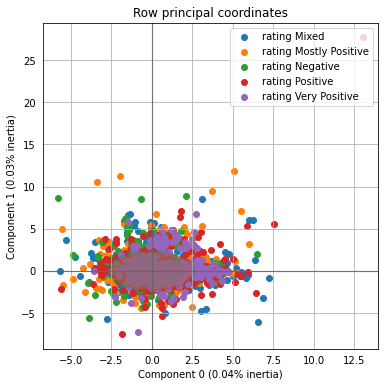

In [ ]:
ax = famd.plot_row_coordinates(
     df_train_famd,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     #labels=df_train_famd.index,
     color_labels=['rating {}'.format(t) for t in df_train['rating']],
     ellipse_outline=True,
     ellipse_fill=True,
     show_points=True
 )


In [ ]:
famd = FAMD(n_components =2, n_iter = 3, random_state = 101)

famd.fit(df_train_famd.drop('rating', axis='columns'))
famd.transform(df_train_famd)
#famd.plot_row_coordinates(df_train_famd,figsize=(15, 10))

Del reporte en html generado se observa que no hay valores nulos en ninguna columna, por otro lado, al estudiar las correlaciones de variables numéricas, se observa que la mayor correlación es entre estimated_sells con average_playtime, seguido por achevemnts con price. Como se puede apreciar, la variable english es casi independiente del resto de las variables, y required_age presenta una dependencia levemente mayor que english con el resto de las variables.

En cuanto a las variables, se realiza una breve descripción:

* **name:** presenta solo nombres distintos, es decir, no tiene elementos duplicados.

* **release_date:** Se puede modificar a numerico para conocer su distribución.

* **english:** categórica, casi todos son en inglés, solo 112 casos no lo son.

* **developer:** variable categórica

* **publisher:** variable categórica

* **platforms:** variable categórica con solo 5 categorías (mezclas de windows, mac y linux)

* **requiered_age:** variable numerica, con números 0 (95%), 18, 16, 12, 7 y 3. Podría ser categórica como no tiene el resto.

* **categories:** categorical 1933 categorías

* **genres:** categórica 844 categorías
* **tags:** 3981 categorías 

* **achievements:** variable numérica, alta concenctración en 0, alta dispersión hacia valores altos, podrían ser outliers.

* **average_playtime:** variable numérica con comportamiento similar a la variable achievements.

* **price:** distribución similar a una exponencial.
* **short_description:** variable de texto libre.

* **estimated_sells:** variable numérica, mismo comportamiento que achievements.

* **rating:** 5 categorías, se puede transformar a números y que sean de 0 al 4. Las clases están relativamente balanceadas.

Para estudiar relaciones entre las variables de forma bi-dimensional, se realiza una proyección mediante UMAP con los atributos numéricos, en la cual no se observan zonas donde se concentren  colores en particular, descartando la posibilidad que alguna calificación comparta alguna relación directa con un atributo, más bien son concentraciones de puntos con atributos cercanos entre sí, pero los colores son de todo tipo. Al acercar a las zonas donde se observa un solo color, se ve claramente que hay juegos de todo tipo de rating en una misma agrupación de puntos. Esto queda probado por las correlaciones por cada característica que se realiza.

Al realizar un FAMD, que mezcla los atributos categóricos con los numéricos, se observa lo mismo que en UMAP, por lo que se requiere realizar transformaciones o realizar una extracción de atributos que utilice las variables en formato texto texto. Las elipses que caracterizan cada rating están todas concentradas en la misma zona.

---

## 3. Preparación de Datos

Para preparar nuestros datos, primero se procesa el texto, dejando las descripciones como bag of words:

In [ ]:
nltk.download('stopwords')

stop_words = stopwords.words('english')
nltk.download('punkt')

# Definimos un tokenizador con Stemming
class StemmerTokenizer:
    def __init__(self):
        self.ps = PorterStemmer()
    def __call__(self, doc):
        doc_tok = word_tokenize(doc)
        doc_tok = [t for t in doc_tok if t not in stop_words]
        return [self.ps.stem(t) for t in doc_tok]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Además, se juntan las columnas ```tags``` y ```genres```, pues muchas de las categorías son compartidas y algunas repetidas, por lo que cuando se utilice un tokenizer, se eliminarán duplicados:

In [ ]:
cols = ['genres', 'tags']
df_train['gentags'] = df_train[cols].apply(lambda row: ';'.join(row.values.astype(str)), axis=1)


Luego, preparamos un `ColumnTransformer` que prepara los datos, se eliminan duplicados de la nueva columna ```gentags``` y se seleccionan atributos para cada clasificador:

In [ ]:
numerics = ["required_age", "achievements", "average_playtime", "price", 'required_age']
text = ["publisher"]
# cat = ['platforms','categories','genres', 'tags']

re_exp = r'\;'
CVectorizer1 = CountVectorizer(tokenizer=lambda texto: re.split(re_exp,texto), decode_error='ignore') 
CVectorizer2 = CountVectorizer(tokenizer=lambda texto: re.split(re_exp,texto), decode_error='ignore')
CVectorizer3 = CountVectorizer(tokenizer=lambda texto: list(set(re.split(re_exp,texto))), decode_error='ignore')
# CVectorizer4 = CountVectorizer(tokenizer=lambda texto: re.split(re_exp,texto), decode_error='ignore')

bow = CountVectorizer(tokenizer=StemmerTokenizer(), ngram_range=(1, 2), strip_accents = "ascii", decode_error='ignore')  # bigramas

ct = ColumnTransformer(
    [
        ("Scaler", MinMaxScaler(), numerics),
        ("plat", CVectorizer1, 'platforms'),
        # ("cat", CVectorizer2, 'categories'),
         ("gen", CVectorizer3, 'gentags'),
        # ("tag", CVectorizer4, 'tags'), 
        
        # ("OneHot", OneHotEncoder(handle_unknown='ignore'), text),
         ("Bow", bow, "short_description"),
    ]
)


In [ ]:
numerics2 = ["required_age", "achievements", "average_playtime", "price"]
ct2 = ColumnTransformer(
    [
        ("Scaler", RobustScaler(), numerics2),
        ("plat", CVectorizer1, 'platforms'),
        #("cat", CVectorizer2, 'categories'),
        ("gen", CVectorizer3, 'gentags'),
        # ("tag", CVectorizer4, 'tags'), 
        
        # ("OneHot", OneHotEncoder(handle_unknown='ignore'), text),
        # ("Bow", bow, "short_description"),
    ]
)

Al realizar distintas pruebas, se utilizarn aquellas variables que dieron mejor desempeño en el Baseline de la próxima sección, generando un preprocesamiento distinto para cada problema.

---

## 4. Baseline

Primero se crea una transformación que se utilizará en el pipeline de la regresión, pues es necesario tener los datos en tipo dense:

In [ ]:
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

Adjuntamos las transformaciones anteriores en un solo `Pipeline` y agregamos al final un clasificador `HistGradientBoostingClassifier`, con algunos de sus parámetros, se particiona el conjunto de entrenamiento para ver comportamientos en un potencial conjunto de test:


In [ ]:
df_y = df_train.loc[:,"rating"]
df_X = df_train.drop(["rating", "estimated_sells"], axis=1)


X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.33, random_state=42, stratify=df_y 
)

#pipeline = Pipeline([('ct', ct), ('clf', RandomForestClassifier(criterion='gini', n_estimators=500, random_state=42))])
pipeline = Pipeline([('ct', ct), 
                     ('toDense', DenseTransformer()),
                     ('clf', HistGradientBoostingClassifier(loss='deviance', n_estimators=150, criterion='squared_error'))])
ola = pipeline.fit(X_train,y_train)


# clf = Pipeline([('clf', MultinomialNB())])
# clf.fit(X = ola,y = y_train)

# chao = pipeline.fit(X_test)

y_pred = pipeline.predict(X_test)
print(classification_report(y_pred, y_test))

# chao = pd.DataFrame(ola.toarray(), columns=pipeline.get_feature_names_out())



                 precision    recall  f1-score   support

          Mixed       0.18      0.29      0.22       345
Mostly Positive       0.12      0.28      0.17       243
       Negative       0.33      0.35      0.34       399
       Positive       0.63      0.29      0.40      1430
  Very Positive       0.16      0.35      0.22       184

       accuracy                           0.30      2601
      macro avg       0.28      0.31      0.27      2601
   weighted avg       0.44      0.30      0.33      2601



Se realiza lo mismo que en el bloque anterior, pero para el segundo clasificador, que corresponde a un `HistGradientBoostingRegressor`:

In [ ]:
# Otro Clasificador
df_y2 = df_train.loc[:,"estimated_sells"]
df_X2 = df_train.drop(["rating", "estimated_sells"], axis=1)


X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df_X2, df_y2, test_size=0.33, random_state=42)


#pipeline = Pipeline([('ct', ctr), ('clf', GradientBoostingRegressor())])

pipeline = Pipeline([('ct', ct2), 
                    ('toDense', DenseTransformer()),
                     ('clf', HistGradientBoostingRegressor(max_bins=190))])

ola = pipeline.fit(X_train2,y_train2)
# ola
# chao = pd.DataFrame(ola.toarray(), columns=pipeline.get_feature_names_out())
# chao
# clf = Pipeline([('clf', MultinomialNB())])
# clf.fit(X = ola,y = y_train)

# chao = pipeline.fit(X_test)

y_pred2 = pipeline.predict(X_test2)

print(r2_score(y_test2, y_pred2))
# print(classification_report(y_pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



0.25530611338578213


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



---

## 5. Optimización del Modelo

Ahora, agregamos selección y/o reducción de atributos y probaremos una combinación de diferentes parámetros para mejorar nuestro modelo:

In [ ]:
# grilla_parametros = [{'seleccion': SelectPercentile , 'percentile': [25, 50, 75], 'clf': clf_1}, 
#                      {'clf': clf_2, 'steps'; n},
#                      {...}, 
#                     ]
# gs_2 = HalvingGridSearchCV(pipeline_clf, grilla_parametros, metric='la_metrica_que_optimiza_el_problema')
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV


selection_pipeline = Pipeline(steps=[
    ('ct', ct),
    #('toDense', DenseTransformer()),
    ("clf", MultinomialNB()),
])


grid_params = [
    # Random Forest
    # {
    #     "clf": [RandomForestClassifier(random_state=42)],
    #     "clf__criterion": ["gini", "entropy"],
    #     "clf__n_estimators": [250,500]
    # },

    # Support Vector Classifier
    {
        "clf": [GradientBoostingClassifier(random_state=42)],
        "clf__n_estimators": [100, 200, 300],
        "clf__max_depth": [3, 5, 8],
    },

]

hgs = HalvingGridSearchCV(selection_pipeline, grid_params, verbose = 10, scoring = 'f1_weighted')

df_y1 = df_train.loc[:,"rating"]
df_X1 = df_train.drop(["rating", "estimated_sells"], axis=1)

hgs.fit(df_X1,df_y1)



n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 875
max_resources_: 7881
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 875
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START clf=GradientBoostingClassifier(random_state=42), clf__max_depth=3, clf__n_estimators=100
[CV 1/5; 1/9] END clf=GradientBoostingClassifier(random_state=42), clf__max_depth=3, clf__n_estimators=100;, score=(train=0.999, test=0.240) total time=   7.8s
[CV 2/5; 1/9] START clf=GradientBoostingClassifier(random_state=42), clf__max_depth=3, clf__n_estimators=100
[CV 2/5; 1/9] END clf=GradientBoostingClassifier(random_state=42), clf__max_depth=3, clf__n_estimators=100;, score=(train=0.996, test=0.293) total time=   8.0s
[CV 3/5; 1/9] START clf=GradientBoostingClassifier(random_state=42), clf__max_depth=3, clf__n_estimators=100
[CV 3/5; 1/9] END clf=GradientBoostingClassifier(random_state=42), clf__max_depth=3, clf__n_es

HalvingGridSearchCV(estimator=Pipeline(steps=[('ct',
                                               ColumnTransformer(transformers=[('Scaler',
                                                                                MinMaxScaler(),
                                                                                ['required_age',
                                                                                 'achievements',
                                                                                 'average_playtime',
                                                                                 'price',
                                                                                 'required_age']),
                                                                               ('plat',
                                                                                CountVectorizer(decode_error='ignore',
                                                                      

Pudimos ver que mejor modelo mejora los resultados obtenidos en el baseline.

In [ ]:
print(hgs.best_score_)
print(hgs.best_params_)
# gs_2.best_...

0.3099997983098364
{'clf': GradientBoostingClassifier(max_depth=8, random_state=42), 'clf__max_depth': 8, 'clf__n_estimators': 100}


Por otra parte, el segundo baseline, se configura y se realiza el gridsearch con los regresores `RandomForestRegressor`  y  `HistGradientBoostingRegressor`

In [ ]:
pipeline_clf = Pipeline([('ct', ct), 
                     ('clf', RandomForestClassifier(criterion='entropy', n_estimators=250, random_state=42))])

bestRandomForestClf = pipeline_clf.fit(X_train2,y_train2)

y_pred = pipeline_clf.predict(X_test)
print(classification_report(y_pred, y_test))

In [ ]:
selection_pipeline2 = Pipeline(steps=[
    ('ct', ct2),
    ('toDense', DenseTransformer()),
    ("clf", Ridge()),
])


grid_params2 = [
    # Random Forest
    {
        "clf": [RandomForestRegressor(random_state=42)],
        "clf__criterion": ["squared_error", "absolute_error", "poisson"],
        "clf__min_samples_split": [2,4,6]
    },
    # Support Vector Classifier
    {
        "clf": [HistGradientBoostingRegressor(random_state=42)],
        "clf__loss": ["squared_error", "absolute_error", "poisson"],
        "clf__learning_rate": [0.1, 0.2, 0.05],
        "clf__max_bins": [100, 150, 175, 190, 225, 255]
        
        
    },

]

hgs2 = HalvingGridSearchCV(selection_pipeline2, grid_params2, verbose = 10, scoring ='r2')

hgs2.fit(X_train2,y_train2)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 195
max_resources_: 5280
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 63
n_resources: 195
Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV 1/5; 1/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 1/5; 1/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=2;, score=(train=0.885, test=0.455) total time=   0.3s
[CV 2/5; 1/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 1/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=2;, score=(train=0.921, test=-0.489) total time=   0.3s
[CV 3/5; 1/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 1/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=2;, score=(train=0.824, test=0.156) total time=   0.3s
[CV 4/5; 1/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 1/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=2;, score=(train=0.974, test=-0.029) total time=   0.3s
[CV 5/5; 1/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 1/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=2;, score=(train=0.901, test=0.389) total time=   0.3s
[CV 1/5; 2/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 2/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=4;, score=(train=0.885, test=0.458) total time=   0.3s
[CV 2/5; 2/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 2/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=4;, score=(train=0.865, test=-0.562) total time=   0.3s
[CV 3/5; 2/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 2/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=4;, score=(train=0.703, test=0.203) total time=   0.3s
[CV 4/5; 2/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 2/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=4;, score=(train=0.927, test=-0.024) total time=   0.3s
[CV 5/5; 2/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 2/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=4;, score=(train=0.891, test=0.402) total time=   0.3s
[CV 1/5; 3/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 3/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=6;, score=(train=0.884, test=0.453) total time=   0.3s
[CV 2/5; 3/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 3/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=6;, score=(train=0.788, test=-0.512) total time=   0.3s
[CV 3/5; 3/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 3/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=6;, score=(train=0.668, test=0.188) total time=   0.2s
[CV 4/5; 3/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 3/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=6;, score=(train=0.926, test=-0.061) total time=   0.3s
[CV 5/5; 3/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 3/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=squared_error, clf__min_samples_split=6;, score=(train=0.890, test=0.409) total time=   0.2s
[CV 1/5; 4/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 4/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2;, score=(train=0.884, test=0.489) total time=   1.6s
[CV 2/5; 4/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 4/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2;, score=(train=0.916, test=-0.310) total time=   1.8s
[CV 3/5; 4/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 4/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2;, score=(train=0.832, test=0.322) total time=   1.9s
[CV 4/5; 4/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 4/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2;, score=(train=0.974, test=-0.004) total time=   1.9s
[CV 5/5; 4/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 4/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2;, score=(train=0.901, test=0.370) total time=   1.6s
[CV 1/5; 5/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 5/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4;, score=(train=0.884, test=0.505) total time=   1.6s
[CV 2/5; 5/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 5/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4;, score=(train=0.855, test=-0.253) total time=   1.7s
[CV 3/5; 5/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 5/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4;, score=(train=0.745, test=0.338) total time=   3.0s
[CV 4/5; 5/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 5/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4;, score=(train=0.928, test=-0.028) total time=   3.1s
[CV 5/5; 5/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 5/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4;, score=(train=0.899, test=0.409) total time=   1.6s
[CV 1/5; 6/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 6/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6;, score=(train=0.884, test=0.499) total time=   1.6s
[CV 2/5; 6/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 6/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6;, score=(train=0.808, test=-0.324) total time=   1.7s
[CV 3/5; 6/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 6/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6;, score=(train=0.732, test=0.298) total time=   1.9s
[CV 4/5; 6/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 6/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6;, score=(train=0.927, test=-0.033) total time=   1.9s
[CV 5/5; 6/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 6/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6;, score=(train=0.898, test=0.408) total time=   1.6s
[CV 1/5; 7/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 7/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=2;, score=(train=0.884, test=0.254) total time=   0.4s
[CV 2/5; 7/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 7/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=2;, score=(train=0.875, test=-0.519) total time=   0.5s
[CV 3/5; 7/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 7/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=2;, score=(train=0.830, test=0.147) total time=   0.4s
[CV 4/5; 7/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 7/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=2;, score=(train=0.971, test=-25.484) total time=   0.4s
[CV 5/5; 7/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 7/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=2;, score=(train=0.899, test=0.379) total time=   0.5s
[CV 1/5; 8/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 8/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=4;, score=(train=0.884, test=0.283) total time=   0.4s
[CV 2/5; 8/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 8/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=4;, score=(train=0.731, test=-0.521) total time=   0.5s
[CV 3/5; 8/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 8/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=4;, score=(train=0.604, test=0.137) total time=   0.4s
[CV 4/5; 8/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 8/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=4;, score=(train=0.968, test=-25.533) total time=   0.4s
[CV 5/5; 8/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 8/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=4;, score=(train=0.888, test=0.410) total time=   0.4s
[CV 1/5; 9/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 9/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=6;, score=(train=0.884, test=0.289) total time=   0.4s
[CV 2/5; 9/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 9/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=6;, score=(train=0.711, test=-0.530) total time=   0.4s
[CV 3/5; 9/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 9/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=6;, score=(train=0.577, test=0.135) total time=   0.4s
[CV 4/5; 9/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 9/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=6;, score=(train=0.966, test=-25.555) total time=   0.4s
[CV 5/5; 9/63] START clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 5/5; 9/63] END clf=RandomForestRegressor(random_state=42), clf__criterion=poisson, clf__min_samples_split=6;, score=(train=0.887, test=0.410) total time=   0.4s
[CV 1/5; 10/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=100
[CV 1/5; 10/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.366, test=-17.447) total time=   0.1s
[CV 2/5; 10/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 2/5; 10/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.647, test=-1.600) total time=   0.2s
[CV 3/5; 10/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=100
[CV 3/5; 10/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.585, test=0.317) total time=   0.2s
[CV 4/5; 10/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 4/5; 10/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.459, test=-4.189) total time=   0.2s
[CV 5/5; 10/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=100
[CV 5/5; 10/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.387, test=-1.428) total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 1/5; 11/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 11/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.366, test=-17.447) total time=   0.2s
[CV 2/5; 11/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 11/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.647, test=-1.600) total time=   0.2s
[CV 3/5; 11/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 11/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.585, test=0.317) total time=   0.2s
[CV 4/5; 11/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 11/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.459, test=-4.189) total time=   0.2s
[CV 5/5; 11/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 11/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.387, test=-1.428) total time=   0.2s
[CV 1/5; 12/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 12/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.366, test=-17.447) total time=   0.2s
[CV 2/5; 12/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 12/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.647, test=-1.600) total time=   0.2s
[CV 3/5; 12/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 12/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.585, test=0.317) total time=   0.2s
[CV 4/5; 12/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 12/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.459, test=-4.189) total time=   0.2s
[CV 5/5; 12/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 12/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.387, test=-1.428) total time=   0.3s
[CV 1/5; 13/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 13/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.366, test=-17.447) total time=   0.2s
[CV 2/5; 13/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 13/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.647, test=-1.600) total time=   0.2s
[CV 3/5; 13/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 13/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.585, test=0.317) total time=   0.2s
[CV 4/5; 13/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 13/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.459, test=-4.189) total time=   0.2s
[CV 5/5; 13/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 13/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.387, test=-1.428) total time=   0.2s
[CV 1/5; 14/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 14/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.366, test=-17.447) total time=   0.2s
[CV 2/5; 14/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 14/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.647, test=-1.600) total time=   0.3s
[CV 3/5; 14/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 14/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.585, test=0.317) total time=   0.2s
[CV 4/5; 14/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 14/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.459, test=-4.189) total time=   0.2s
[CV 5/5; 14/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 14/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.387, test=-1.428) total time=   0.3s
[CV 1/5; 15/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 15/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.366, test=-17.447) total time=   0.2s
[CV 2/5; 15/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 15/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.647, test=-1.600) total time=   0.2s
[CV 3/5; 15/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 15/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.585, test=0.317) total time=   0.2s
[CV 4/5; 15/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 15/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.459, test=-4.189) total time=   0.2s
[CV 5/5; 15/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 15/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.387, test=-1.428) total time=   0.3s
[CV 1/5; 16/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 16/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100;, score=(train=-0.003, test=0.277) total time=   0.2s
[CV 2/5; 16/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 16/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.210, test=0.245) total time=   0.2s
[CV 3/5; 16/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 16/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.193, test=0.187) total time=   0.2s
[CV 4/5; 16/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 16/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.044, test=0.149) total time=   0.2s
[CV 5/5; 16/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 16/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.026, test=0.066) total time=   0.2s
[CV 1/5; 17/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 17/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150;, score=(train=-0.003, test=0.277) total time=   0.2s
[CV 2/5; 17/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 17/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.210, test=0.245) total time=   0.3s
[CV 3/5; 17/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 17/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.193, test=0.187) total time=   0.3s
[CV 4/5; 17/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 17/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.044, test=0.149) total time=   0.3s
[CV 5/5; 17/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 17/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.026, test=0.066) total time=   0.3s
[CV 1/5; 18/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 18/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175;, score=(train=-0.003, test=0.277) total time=   0.3s
[CV 2/5; 18/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 18/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.210, test=0.245) total time=   0.3s
[CV 3/5; 18/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 18/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.193, test=0.187) total time=   0.3s
[CV 4/5; 18/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 18/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.044, test=0.149) total time=   0.3s
[CV 5/5; 18/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 18/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.026, test=0.066) total time=   0.3s
[CV 1/5; 19/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 19/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190;, score=(train=-0.003, test=0.277) total time=   0.3s
[CV 2/5; 19/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 19/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.210, test=0.245) total time=   0.3s
[CV 3/5; 19/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 19/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.193, test=0.187) total time=   0.3s
[CV 4/5; 19/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 19/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.044, test=0.149) total time=   0.3s
[CV 5/5; 19/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 19/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.026, test=0.066) total time=   0.3s
[CV 1/5; 20/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 20/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=-0.003, test=0.277) total time=   0.3s
[CV 2/5; 20/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 20/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.210, test=0.245) total time=   0.3s
[CV 3/5; 20/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 20/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.193, test=0.187) total time=   0.3s
[CV 4/5; 20/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 20/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.044, test=0.149) total time=   0.3s
[CV 5/5; 20/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 20/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.026, test=0.066) total time=   0.3s
[CV 1/5; 21/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 21/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255;, score=(train=-0.003, test=0.277) total time=   0.3s
[CV 2/5; 21/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 21/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.210, test=0.245) total time=   0.3s
[CV 3/5; 21/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 21/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.193, test=0.187) total time=   0.3s
[CV 4/5; 21/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 21/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.044, test=0.149) total time=   0.3s
[CV 5/5; 21/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 5/5; 21/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.026, test=0.066) total time=   0.3s
[CV 1/5; 22/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=100
[CV 1/5; 22/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=100;, score=(train=1.000, test=0.726) total time=   0.2s
[CV 2/5; 22/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 2/5; 22/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=100;, score=(train=0.933, test=-0.980) total time=   0.2s
[CV 3/5; 22/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=100
[CV 3/5; 22/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=100;, score=(train=0.919, test=0.607) total time=   0.1s
[CV 4/5; 22/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 4/5; 22/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=100;, score=(train=0.995, test=-0.181) total time=   0.2s
[CV 5/5; 22/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=100
[CV 5/5; 22/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=100;, score=(train=0.989, test=-1.371) total time=   0.1s
[CV 1/5; 23/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 1/5; 23/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=150;, score=(train=1.000, test=0.726) total time=   0.2s
[CV 2/5; 23/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 23/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=150;, score=(train=0.933, test=-0.980) total time=   0.2s
[CV 3/5; 23/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 3/5; 23/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=150;, score=(train=0.919, test=0.607) total time=   0.2s
[CV 4/5; 23/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=150
[CV 4/5; 23/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=150;, score=(train=0.995, test=-0.181) total time=   0.2s
[CV 5/5; 23/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 5/5; 23/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=150;, score=(train=0.989, test=-1.371) total time=   0.2s
[CV 1/5; 24/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 24/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=175;, score=(train=1.000, test=0.726) total time=   0.2s
[CV 2/5; 24/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 2/5; 24/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=175;, score=(train=0.933, test=-0.980) total time=   0.2s
[CV 3/5; 24/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 24/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=175;, score=(train=0.919, test=0.607) total time=   0.2s
[CV 4/5; 24/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 24/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=175;, score=(train=0.995, test=-0.181) total time=   0.2s
[CV 5/5; 24/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 24/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=175;, score=(train=0.989, test=-1.371) total time=   0.2s
[CV 1/5; 25/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 25/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=190;, score=(train=1.000, test=0.726) total time=   0.2s
[CV 2/5; 25/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 25/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=190;, score=(train=0.933, test=-0.980) total time=   0.3s
[CV 3/5; 25/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 25/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=190;, score=(train=0.919, test=0.607) total time=   0.2s
[CV 4/5; 25/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 4/5; 25/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=190;, score=(train=0.995, test=-0.181) total time=   0.2s
[CV 5/5; 25/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 25/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=190;, score=(train=0.989, test=-1.371) total time=   0.2s
[CV 1/5; 26/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 26/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=225;, score=(train=1.000, test=0.726) total time=   0.3s
[CV 2/5; 26/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 26/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=225;, score=(train=0.933, test=-0.980) total time=   0.2s
[CV 3/5; 26/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 26/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=225;, score=(train=0.919, test=0.607) total time=   0.2s
[CV 4/5; 26/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 26/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=225;, score=(train=0.995, test=-0.181) total time=   0.2s
[CV 5/5; 26/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 26/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=225;, score=(train=0.989, test=-1.371) total time=   0.3s
[CV 1/5; 27/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 27/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=255;, score=(train=1.000, test=0.726) total time=   0.2s
[CV 2/5; 27/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 27/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=255;, score=(train=0.933, test=-0.980) total time=   0.3s
[CV 3/5; 27/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 27/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=255;, score=(train=0.919, test=0.607) total time=   0.2s
[CV 4/5; 27/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 27/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=255;, score=(train=0.995, test=-0.181) total time=   0.3s
[CV 5/5; 27/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 5/5; 27/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=poisson, clf__max_bins=255;, score=(train=0.989, test=-1.371) total time=   0.2s
[CV 1/5; 28/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=100
[CV 1/5; 28/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.560, test=-33.106) total time=   0.1s
[CV 2/5; 28/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 2/5; 28/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.743, test=-2.241) total time=   0.2s
[CV 3/5; 28/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=100
[CV 3/5; 28/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.705, test=0.316) total time=   0.1s
[CV 4/5; 28/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 4/5; 28/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.644, test=-5.220) total time=   0.2s
[CV 5/5; 28/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=100
[CV 5/5; 28/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.559, test=-3.290) total time=   0.2s
[CV 1/5; 29/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 1/5; 29/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.560, test=-33.106) total time=   0.2s
[CV 2/5; 29/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 29/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.743, test=-2.241) total time=   0.2s
[CV 3/5; 29/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 29/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.705, test=0.316) total time=   0.2s
[CV 4/5; 29/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 29/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.644, test=-5.220) total time=   0.2s
[CV 5/5; 29/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 29/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.559, test=-3.290) total time=   0.2s
[CV 1/5; 30/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 30/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.560, test=-33.106) total time=   0.2s
[CV 2/5; 30/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 30/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.743, test=-2.241) total time=   0.2s
[CV 3/5; 30/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 30/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.705, test=0.316) total time=   0.2s
[CV 4/5; 30/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 30/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.644, test=-5.220) total time=   0.2s
[CV 5/5; 30/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 30/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.559, test=-3.290) total time=   0.2s
[CV 1/5; 31/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 31/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.560, test=-33.106) total time=   0.2s
[CV 2/5; 31/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 31/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.743, test=-2.241) total time=   0.3s
[CV 3/5; 31/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 31/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.705, test=0.316) total time=   0.2s
[CV 4/5; 31/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 31/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.644, test=-5.220) total time=   0.2s
[CV 5/5; 31/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 31/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.559, test=-3.290) total time=   0.2s
[CV 1/5; 32/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 32/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.560, test=-33.106) total time=   0.3s
[CV 2/5; 32/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 32/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.743, test=-2.241) total time=   0.3s
[CV 3/5; 32/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 32/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.705, test=0.316) total time=   0.2s
[CV 4/5; 32/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 32/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.644, test=-5.220) total time=   0.3s
[CV 5/5; 32/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 32/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.559, test=-3.290) total time=   0.3s
[CV 1/5; 33/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 33/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.560, test=-33.106) total time=   0.3s
[CV 2/5; 33/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 33/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.743, test=-2.241) total time=   0.3s
[CV 3/5; 33/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 33/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.705, test=0.316) total time=   0.3s
[CV 4/5; 33/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 33/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.644, test=-5.220) total time=   0.3s
[CV 5/5; 33/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 33/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.559, test=-3.290) total time=   0.3s
[CV 1/5; 34/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 34/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=-0.002, test=0.297) total time=   0.2s
[CV 2/5; 34/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 34/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.274, test=0.259) total time=   0.2s
[CV 3/5; 34/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 34/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.200, test=0.172) total time=   0.2s
[CV 4/5; 34/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 34/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.061, test=0.145) total time=   0.2s
[CV 5/5; 34/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 34/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.029, test=0.069) total time=   0.2s
[CV 1/5; 35/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 35/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=-0.002, test=0.297) total time=   0.3s
[CV 2/5; 35/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 35/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.274, test=0.259) total time=   0.3s
[CV 3/5; 35/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 35/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.200, test=0.172) total time=   0.3s
[CV 4/5; 35/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 35/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.061, test=0.145) total time=   0.2s
[CV 5/5; 35/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 35/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.029, test=0.069) total time=   0.3s
[CV 1/5; 36/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 36/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=-0.002, test=0.297) total time=   0.3s
[CV 2/5; 36/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 36/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.274, test=0.259) total time=   0.3s
[CV 3/5; 36/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 36/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.200, test=0.172) total time=   0.3s
[CV 4/5; 36/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 36/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.061, test=0.145) total time=   0.3s
[CV 5/5; 36/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 36/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.029, test=0.069) total time=   0.3s
[CV 1/5; 37/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 37/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=-0.002, test=0.297) total time=   0.3s
[CV 2/5; 37/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 37/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.274, test=0.259) total time=   0.3s
[CV 3/5; 37/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 37/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.200, test=0.172) total time=   0.3s
[CV 4/5; 37/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 37/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.061, test=0.145) total time=   0.3s
[CV 5/5; 37/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 37/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.029, test=0.069) total time=   0.3s
[CV 1/5; 38/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 38/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=-0.002, test=0.297) total time=   0.3s
[CV 2/5; 38/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 38/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.274, test=0.259) total time=   0.3s
[CV 3/5; 38/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 38/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.200, test=0.172) total time=   0.3s
[CV 4/5; 38/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 38/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.061, test=0.145) total time=   0.3s
[CV 5/5; 38/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 38/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.029, test=0.069) total time=   0.3s
[CV 1/5; 39/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 39/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=-0.002, test=0.297) total time=   0.3s
[CV 2/5; 39/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 39/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.274, test=0.259) total time=   0.3s
[CV 3/5; 39/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 39/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.200, test=0.172) total time=   0.3s
[CV 4/5; 39/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 39/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.061, test=0.145) total time=   0.3s
[CV 5/5; 39/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 5/5; 39/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.029, test=0.069) total time=   0.3s
[CV 1/5; 40/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=100
[CV 1/5; 40/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=100;, score=(train=1.000, test=0.706) total time=   0.1s
[CV 2/5; 40/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 2/5; 40/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=100;, score=(train=0.980, test=-0.676) total time=   0.2s
[CV 3/5; 40/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=100
[CV 3/5; 40/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=100;, score=(train=0.978, test=0.484) total time=   0.2s
[CV 4/5; 40/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 4/5; 40/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=100;, score=(train=0.998, test=-0.050) total time=   0.2s
[CV 5/5; 40/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=100
[CV 5/5; 40/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=100;, score=(train=0.998, test=-1.389) total time=   0.2s
[CV 1/5; 41/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 1/5; 41/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=150;, score=(train=1.000, test=0.706) total time=   0.2s
[CV 2/5; 41/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 41/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=150;, score=(train=0.980, test=-0.676) total time=   0.2s
[CV 3/5; 41/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 41/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=150;, score=(train=0.978, test=0.484) total time=   0.2s
[CV 4/5; 41/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 41/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=150;, score=(train=0.998, test=-0.050) total time=   0.2s
[CV 5/5; 41/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 41/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=150;, score=(train=0.998, test=-1.389) total time=   0.2s
[CV 1/5; 42/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 42/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=175;, score=(train=1.000, test=0.706) total time=   0.2s
[CV 2/5; 42/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 42/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=175;, score=(train=0.980, test=-0.676) total time=   0.2s
[CV 3/5; 42/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 42/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=175;, score=(train=0.978, test=0.484) total time=   0.2s
[CV 4/5; 42/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 4/5; 42/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=175;, score=(train=0.998, test=-0.050) total time=   0.2s
[CV 5/5; 42/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 42/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=175;, score=(train=0.998, test=-1.389) total time=   0.2s
[CV 1/5; 43/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 43/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=190;, score=(train=1.000, test=0.706) total time=   0.2s
[CV 2/5; 43/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 43/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=190;, score=(train=0.980, test=-0.676) total time=   0.2s
[CV 3/5; 43/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 43/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=190;, score=(train=0.978, test=0.484) total time=   0.2s
[CV 4/5; 43/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 43/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=190;, score=(train=0.998, test=-0.050) total time=   0.2s
[CV 5/5; 43/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 43/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=190;, score=(train=0.998, test=-1.389) total time=   0.2s
[CV 1/5; 44/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 44/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=225;, score=(train=1.000, test=0.706) total time=   0.2s
[CV 2/5; 44/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 44/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=225;, score=(train=0.980, test=-0.676) total time=   0.3s
[CV 3/5; 44/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 44/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=225;, score=(train=0.978, test=0.484) total time=   0.2s
[CV 4/5; 44/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 44/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=225;, score=(train=0.998, test=-0.050) total time=   0.2s
[CV 5/5; 44/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 44/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=225;, score=(train=0.998, test=-1.389) total time=   0.2s
[CV 1/5; 45/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 45/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=255;, score=(train=1.000, test=0.706) total time=   0.3s
[CV 2/5; 45/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 45/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=255;, score=(train=0.980, test=-0.676) total time=   0.2s
[CV 3/5; 45/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 45/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=255;, score=(train=0.978, test=0.484) total time=   0.2s
[CV 4/5; 45/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 45/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=255;, score=(train=0.998, test=-0.050) total time=   0.2s
[CV 5/5; 45/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 5/5; 45/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=poisson, clf__max_bins=255;, score=(train=0.998, test=-1.389) total time=   0.3s
[CV 1/5; 46/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=100
[CV 1/5; 46/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.228, test=-7.126) total time=   0.1s
[CV 2/5; 46/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 2/5; 46/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.577, test=-1.044) total time=   0.2s
[CV 3/5; 46/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=100
[CV 3/5; 46/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.483, test=0.284) total time=   0.1s
[CV 4/5; 46/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 4/5; 46/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.325, test=-3.085) total time=   0.2s
[CV 5/5; 46/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=100
[CV 5/5; 46/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=100;, score=(train=0.264, test=-0.561) total time=   0.2s
[CV 1/5; 47/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 47/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.228, test=-7.126) total time=   0.2s
[CV 2/5; 47/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 2/5; 47/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.577, test=-1.044) total time=   0.2s
[CV 3/5; 47/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 47/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.483, test=0.284) total time=   0.2s
[CV 4/5; 47/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 47/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.325, test=-3.085) total time=   0.2s
[CV 5/5; 47/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 47/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=150;, score=(train=0.264, test=-0.561) total time=   0.2s
[CV 1/5; 48/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 48/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.228, test=-7.126) total time=   0.2s
[CV 2/5; 48/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 48/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.577, test=-1.044) total time=   0.2s
[CV 3/5; 48/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 48/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.483, test=0.284) total time=   0.2s
[CV 4/5; 48/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 48/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.325, test=-3.085) total time=   0.2s
[CV 5/5; 48/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 48/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=175;, score=(train=0.264, test=-0.561) total time=   0.2s
[CV 1/5; 49/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 49/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.228, test=-7.126) total time=   0.2s
[CV 2/5; 49/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 49/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.577, test=-1.044) total time=   0.3s
[CV 3/5; 49/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 49/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.483, test=0.284) total time=   0.2s
[CV 4/5; 49/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 49/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.325, test=-3.085) total time=   0.3s
[CV 5/5; 49/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 49/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=190;, score=(train=0.264, test=-0.561) total time=   0.2s
[CV 1/5; 50/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 50/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.228, test=-7.126) total time=   0.3s
[CV 2/5; 50/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 50/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.577, test=-1.044) total time=   0.3s
[CV 3/5; 50/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 50/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.483, test=0.284) total time=   0.3s
[CV 4/5; 50/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 50/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.325, test=-3.085) total time=   0.3s
[CV 5/5; 50/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 50/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=225;, score=(train=0.264, test=-0.561) total time=   0.3s
[CV 1/5; 51/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 51/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.228, test=-7.126) total time=   0.3s
[CV 2/5; 51/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 51/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.577, test=-1.044) total time=   0.3s
[CV 3/5; 51/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 51/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.483, test=0.284) total time=   0.3s
[CV 4/5; 51/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 51/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.325, test=-3.085) total time=   0.3s
[CV 5/5; 51/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 51/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=squared_error, clf__max_bins=255;, score=(train=0.264, test=-0.561) total time=   0.3s
[CV 1/5; 52/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 52/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100;, score=(train=-0.004, test=0.216) total time=   0.2s
[CV 2/5; 52/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 52/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.173, test=0.228) total time=   0.3s
[CV 3/5; 52/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 52/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.163, test=0.174) total time=   0.2s
[CV 4/5; 52/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 52/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.042, test=0.157) total time=   0.2s
[CV 5/5; 52/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 52/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.021, test=0.055) total time=   0.2s
[CV 1/5; 53/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 53/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150;, score=(train=-0.004, test=0.216) total time=   0.3s
[CV 2/5; 53/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 53/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.173, test=0.228) total time=   0.4s
[CV 3/5; 53/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 53/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.163, test=0.174) total time=   0.3s
[CV 4/5; 53/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 53/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.042, test=0.157) total time=   0.3s
[CV 5/5; 53/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 53/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.021, test=0.055) total time=   0.3s
[CV 1/5; 54/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 54/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175;, score=(train=-0.004, test=0.216) total time=   0.3s
[CV 2/5; 54/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 54/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.173, test=0.228) total time=   0.3s
[CV 3/5; 54/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 54/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.163, test=0.174) total time=   0.3s
[CV 4/5; 54/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 54/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.042, test=0.157) total time=   0.3s
[CV 5/5; 54/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 54/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.021, test=0.055) total time=   0.3s
[CV 1/5; 55/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 55/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190;, score=(train=-0.004, test=0.216) total time=   0.3s
[CV 2/5; 55/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 55/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.173, test=0.228) total time=   0.3s
[CV 3/5; 55/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 55/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.163, test=0.174) total time=   0.3s
[CV 4/5; 55/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 55/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.042, test=0.157) total time=   0.3s
[CV 5/5; 55/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 55/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.021, test=0.055) total time=   0.3s
[CV 1/5; 56/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 56/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225;, score=(train=-0.004, test=0.216) total time=   0.3s
[CV 2/5; 56/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 56/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.173, test=0.228) total time=   0.3s
[CV 3/5; 56/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 56/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.163, test=0.174) total time=   0.3s
[CV 4/5; 56/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 56/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.042, test=0.157) total time=   0.3s
[CV 5/5; 56/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 56/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.021, test=0.055) total time=   0.3s
[CV 1/5; 57/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 57/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255;, score=(train=-0.004, test=0.216) total time=   0.3s
[CV 2/5; 57/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 57/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.173, test=0.228) total time=   0.3s
[CV 3/5; 57/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 57/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.163, test=0.174) total time=   0.3s
[CV 4/5; 57/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 57/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.042, test=0.157) total time=   0.3s
[CV 5/5; 57/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 5/5; 57/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.021, test=0.055) total time=   0.3s
[CV 1/5; 58/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=100
[CV 1/5; 58/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=100;, score=(train=0.991, test=0.690) total time=   0.1s
[CV 2/5; 58/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 2/5; 58/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=100;, score=(train=0.824, test=-0.906) total time=   0.2s
[CV 3/5; 58/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=100
[CV 3/5; 58/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=100;, score=(train=0.768, test=0.602) total time=   0.2s
[CV 4/5; 58/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 4/5; 58/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=100;, score=(train=0.930, test=-0.595) total time=   0.1s
[CV 5/5; 58/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 5/5; 58/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=100;, score=(train=0.904, test=-1.982) total time=   0.2s
[CV 1/5; 59/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 59/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=150;, score=(train=0.991, test=0.690) total time=   0.2s
[CV 2/5; 59/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 59/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=150;, score=(train=0.824, test=-0.906) total time=   0.2s
[CV 3/5; 59/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 59/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=150;, score=(train=0.768, test=0.602) total time=   0.2s
[CV 4/5; 59/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 59/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=150;, score=(train=0.930, test=-0.595) total time=   0.2s
[CV 5/5; 59/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 59/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=150;, score=(train=0.904, test=-1.982) total time=   0.2s
[CV 1/5; 60/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 60/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=175;, score=(train=0.991, test=0.690) total time=   0.2s
[CV 2/5; 60/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 60/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=175;, score=(train=0.824, test=-0.906) total time=   0.2s
[CV 3/5; 60/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 60/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=175;, score=(train=0.768, test=0.602) total time=   0.3s
[CV 4/5; 60/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 60/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=175;, score=(train=0.930, test=-0.595) total time=   0.2s
[CV 5/5; 60/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 60/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=175;, score=(train=0.904, test=-1.982) total time=   0.2s
[CV 1/5; 61/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 61/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=190;, score=(train=0.991, test=0.690) total time=   0.2s
[CV 2/5; 61/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 61/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=190;, score=(train=0.824, test=-0.906) total time=   0.3s
[CV 3/5; 61/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 61/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=190;, score=(train=0.768, test=0.602) total time=   0.2s
[CV 4/5; 61/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 61/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=190;, score=(train=0.930, test=-0.595) total time=   0.2s
[CV 5/5; 61/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 61/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=190;, score=(train=0.904, test=-1.982) total time=   0.2s
[CV 1/5; 62/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 62/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=225;, score=(train=0.991, test=0.690) total time=   0.3s
[CV 2/5; 62/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 62/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=225;, score=(train=0.824, test=-0.906) total time=   0.3s
[CV 3/5; 62/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 62/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=225;, score=(train=0.768, test=0.602) total time=   0.3s
[CV 4/5; 62/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 62/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=225;, score=(train=0.930, test=-0.595) total time=   0.2s
[CV 5/5; 62/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 62/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=225;, score=(train=0.904, test=-1.982) total time=   0.3s
[CV 1/5; 63/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 63/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=255;, score=(train=0.991, test=0.690) total time=   0.3s
[CV 2/5; 63/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 63/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=255;, score=(train=0.824, test=-0.906) total time=   0.3s
[CV 3/5; 63/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 63/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=255;, score=(train=0.768, test=0.602) total time=   0.3s
[CV 4/5; 63/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 63/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=255;, score=(train=0.930, test=-0.595) total time=   0.2s
[CV 5/5; 63/63] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 63/63] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=poisson, clf__max_bins=255;, score=(train=0.904, test=-1.982) total time=   0.3s
----------
iter: 1
n_candidates: 21
n_resources: 585
Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 1/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.070, test=0.049) total time=   1.0s
[CV 2/5; 1/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 1/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.126, test=0.080) total time=   1.0s
[CV 3/5; 1/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 1/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.061, test=0.123) total time=   1.0s
[CV 4/5; 1/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 1/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.000, test=0.052) total time=   1.0s
[CV 5/5; 1/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 1/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.000, test=-0.003) total time=   0.9s
[CV 1/5; 2/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 2/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.070, test=0.049) total time=   0.9s
[CV 2/5; 2/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 2/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.125, test=0.086) total time=   0.9s
[CV 3/5; 2/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 2/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.061, test=0.123) total time=   0.9s
[CV 4/5; 2/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 2/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.000, test=0.052) total time=   0.9s
[CV 5/5; 2/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 2/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.000, test=-0.003) total time=   0.9s
[CV 1/5; 3/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 3/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.065, test=0.042) total time=   0.9s
[CV 2/5; 3/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 3/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.126, test=0.084) total time=   0.9s
[CV 3/5; 3/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 3/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.044, test=0.100) total time=   0.9s
[CV 4/5; 3/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 3/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.000, test=0.065) total time=   0.9s
[CV 5/5; 3/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 3/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=190;, score=(train=-0.001, test=-0.004) total time=   0.9s
[CV 1/5; 4/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 4/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.063, test=0.040) total time=   0.9s
[CV 2/5; 4/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 4/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.118, test=0.081) total time=   0.9s
[CV 3/5; 4/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 4/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.056, test=0.121) total time=   0.9s
[CV 4/5; 4/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 4/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.000, test=0.064) total time=   0.9s
[CV 5/5; 4/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 4/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=175;, score=(train=-0.001, test=-0.004) total time=   0.8s
[CV 1/5; 5/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 5/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.087, test=0.073) total time=   0.8s
[CV 2/5; 5/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 5/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.099, test=0.070) total time=   0.8s
[CV 3/5; 5/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 5/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.035, test=0.086) total time=   0.8s
[CV 4/5; 5/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 5/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.000, test=0.062) total time=   0.8s
[CV 5/5; 5/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 5/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=150;, score=(train=-0.001, test=-0.004) total time=   0.8s
[CV 1/5; 6/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 6/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.081, test=0.070) total time=   0.7s
[CV 2/5; 6/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 6/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.113, test=0.069) total time=   0.8s
[CV 3/5; 6/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 6/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.050, test=0.105) total time=   0.8s
[CV 4/5; 6/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 6/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.000, test=0.057) total time=   0.7s
[CV 5/5; 6/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 6/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.05, clf__loss=absolute_error, clf__max_bins=100;, score=(train=-0.001, test=-0.004) total time=   0.7s
[CV 1/5; 7/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 7/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6;, score=(train=0.744, test=0.138) total time=   9.9s
[CV 2/5; 7/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 7/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6;, score=(train=0.733, test=0.395) total time=   9.3s
[CV 3/5; 7/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 7/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6;, score=(train=0.696, test=0.320) total time=  12.2s
[CV 4/5; 7/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 7/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6;, score=(train=0.834, test=-67.233) total time=   9.8s
[CV 5/5; 7/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 7/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=6;, score=(train=0.738, test=0.082) total time=  10.8s
[CV 1/5; 8/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 8/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2;, score=(train=0.888, test=0.124) total time=  10.1s
[CV 2/5; 8/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 8/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2;, score=(train=0.833, test=0.418) total time=   9.3s
[CV 3/5; 8/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 8/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2;, score=(train=0.850, test=0.346) total time=  12.2s
[CV 4/5; 8/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 8/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2;, score=(train=0.860, test=-68.774) total time=  10.3s
[CV 5/5; 8/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.

[CV 5/5; 8/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=2;, score=(train=0.783, test=0.079) total time=  11.3s
[CV 1/5; 9/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 9/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.097, test=0.098) total time=   0.8s
[CV 2/5; 9/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 9/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.135, test=0.099) total time=   0.8s
[CV 3/5; 9/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 9/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.082, test=0.133) total time=   0.8s
[CV 4/5; 9/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 9/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.002, test=0.074) total time=   0.7s
[CV 5/5; 9/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 9/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.001, test=-0.001) total time=   0.7s
[CV 1/5; 10/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 10/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.098, test=0.091) total time=   0.9s
[CV 2/5; 10/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 10/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.161, test=0.097) total time=   0.9s
[CV 3/5; 10/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 10/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.076, test=0.122) total time=   0.9s
[CV 4/5; 10/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 10/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.001, test=0.079) total time=   0.9s
[CV 5/5; 10/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 10/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.001, test=-0.000) total time=   0.8s
[CV 1/5; 11/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 11/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.100, test=0.096) total time=   0.9s
[CV 2/5; 11/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 11/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.142, test=0.072) total time=   0.9s
[CV 3/5; 11/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 11/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.078, test=0.134) total time=   0.9s
[CV 4/5; 11/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 11/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.001, test=0.064) total time=   0.9s
[CV 5/5; 11/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 11/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.000, test=-0.003) total time=   0.9s
[CV 1/5; 12/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 12/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.100, test=0.086) total time=   0.9s
[CV 2/5; 12/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 12/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.155, test=0.098) total time=   0.9s
[CV 3/5; 12/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 12/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.084, test=0.155) total time=   0.9s
[CV 4/5; 12/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 12/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.003, test=0.076) total time=   0.9s
[CV 5/5; 12/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 12/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.001, test=-0.002) total time=   0.9s
[CV 1/5; 13/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 13/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.100, test=0.086) total time=   1.0s
[CV 2/5; 13/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 13/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.146, test=0.096) total time=   1.0s
[CV 3/5; 13/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 13/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.084, test=0.155) total time=   1.0s
[CV 4/5; 13/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 13/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.003, test=0.076) total time=   0.9s
[CV 5/5; 13/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 13/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.001, test=-0.002) total time=   0.9s
[CV 1/5; 14/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 14/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.097, test=0.092) total time=   0.8s
[CV 2/5; 14/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 14/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.154, test=0.074) total time=   0.8s
[CV 3/5; 14/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 14/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.082, test=0.138) total time=   0.9s
[CV 4/5; 14/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 14/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.003, test=0.074) total time=   0.8s
[CV 5/5; 14/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 14/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.002, test=-0.001) total time=   0.8s
[CV 1/5; 15/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 15/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.122, test=0.087) total time=   0.9s
[CV 2/5; 15/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 15/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.163, test=0.113) total time=   0.9s
[CV 3/5; 15/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 15/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.125, test=0.167) total time=   1.0s
[CV 4/5; 15/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 15/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.004, test=0.055) total time=   0.9s
[CV 5/5; 15/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 15/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.001, test=-0.001) total time=   0.9s
[CV 1/5; 16/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 16/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.099, test=0.084) total time=   0.8s
[CV 2/5; 16/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 16/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.149, test=0.113) total time=   0.8s
[CV 3/5; 16/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 16/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.082, test=0.159) total time=   0.7s
[CV 4/5; 16/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 16/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.003, test=0.071) total time=   0.7s
[CV 5/5; 16/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 16/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.001, test=0.001) total time=   0.7s
[CV 1/5; 17/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 17/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.110, test=0.082) total time=   0.8s
[CV 2/5; 17/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 17/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.166, test=0.122) total time=   0.8s
[CV 3/5; 17/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 17/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.144, test=0.231) total time=   0.8s
[CV 4/5; 17/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 17/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.006, test=0.086) total time=   0.8s
[CV 5/5; 17/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 17/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.001, test=0.003) total time=   0.8s
[CV 1/5; 18/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 18/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.100, test=0.092) total time=   0.8s
[CV 2/5; 18/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 18/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.176, test=0.118) total time=   0.9s
[CV 3/5; 18/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 18/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.124, test=0.131) total time=   0.8s
[CV 4/5; 18/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 18/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.004, test=0.073) total time=   0.9s
[CV 5/5; 18/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 18/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.002, test=0.002) total time=   0.8s
[CV 1/5; 19/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 19/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.138, test=0.115) total time=   0.9s
[CV 2/5; 19/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 19/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.178, test=0.093) total time=   0.9s
[CV 3/5; 19/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 19/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.132, test=0.208) total time=   0.9s
[CV 4/5; 19/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 19/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.004, test=0.082) total time=   0.9s
[CV 5/5; 19/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 19/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.001, test=-0.001) total time=   0.9s
[CV 1/5; 20/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 20/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.122, test=0.087) total time=   0.9s
[CV 2/5; 20/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 20/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.154, test=0.127) total time=   0.9s
[CV 3/5; 20/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 20/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.125, test=0.167) total time=   0.9s
[CV 4/5; 20/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 20/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.004, test=0.055) total time=   0.9s
[CV 5/5; 20/21] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 20/21] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.001, test=-0.001) total time=   0.9s
[CV 1/5; 21/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 21/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4;, score=(train=0.807, test=0.192) total time=   9.9s
[CV 2/5; 21/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 21/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4;, score=(train=0.801, test=0.394) total time=   9.3s
[CV 3/5; 21/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 21/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4;, score=(train=0.736, test=0.293) total time=  12.1s
[CV 4/5; 21/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 21/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4;, score=(train=0.837, test=-66.442) total time=   9.7s
[CV 5/5; 21/21] START clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 21/21] END clf=RandomForestRegressor(random_state=42), clf__criterion=absolute_error, clf__min_samples_split=4;, score=(train=0.746, test=0.108) total time=  10.7s
----------
iter: 2
n_candidates: 7
n_resources: 1755
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 1/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.081, test=0.056) total time=   2.0s
[CV 2/5; 1/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 1/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.079, test=0.004) total time=   2.1s
[CV 3/5; 1/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 1/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.040, test=0.242) total time=   2.0s
[CV 4/5; 1/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 1/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.033, test=0.194) total time=   2.1s
[CV 5/5; 1/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 1/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.1, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.036, test=0.117) total time=   2.1s
[CV 1/5; 2/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 2/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.105, test=0.085) total time=   1.8s
[CV 2/5; 2/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 2/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.091, test=0.005) total time=   1.9s
[CV 3/5; 2/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 2/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.055, test=0.310) total time=   1.8s
[CV 4/5; 2/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 2/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.031, test=0.197) total time=   1.9s
[CV 5/5; 2/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 2/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.037, test=0.129) total time=   1.8s
[CV 1/5; 3/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 3/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.095, test=0.084) total time=   2.1s
[CV 2/5; 3/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 3/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.086, test=0.002) total time=   2.2s
[CV 3/5; 3/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 3/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.051, test=0.310) total time=   2.1s
[CV 4/5; 3/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 3/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.040, test=0.216) total time=   2.1s
[CV 5/5; 3/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 3/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=255;, score=(train=0.046, test=0.100) total time=   2.1s
[CV 1/5; 4/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 4/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.099, test=0.074) total time=   1.5s
[CV 2/5; 4/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 4/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.108, test=0.003) total time=   1.6s
[CV 3/5; 4/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 4/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.053, test=0.285) total time=   1.5s
[CV 4/5; 4/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 4/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.037, test=0.245) total time=   1.6s
[CV 5/5; 4/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 4/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.038, test=0.113) total time=   1.5s
[CV 1/5; 5/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 5/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.085, test=0.080) total time=   2.0s
[CV 2/5; 5/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 5/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.097, test=0.005) total time=   2.0s
[CV 3/5; 5/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 5/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.043, test=0.332) total time=   2.0s
[CV 4/5; 5/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 5/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.035, test=0.191) total time=   2.0s
[CV 5/5; 5/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 5/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.033, test=0.118) total time=   2.0s
[CV 1/5; 6/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 6/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.102, test=0.088) total time=   1.9s
[CV 2/5; 6/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 6/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.109, test=0.009) total time=   1.9s
[CV 3/5; 6/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 6/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.051, test=0.271) total time=   1.9s
[CV 4/5; 6/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 6/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.038, test=0.205) total time=   1.9s
[CV 5/5; 6/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 6/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=190;, score=(train=0.039, test=0.112) total time=   1.9s
[CV 1/5; 7/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 7/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.107, test=0.093) total time=   1.7s
[CV 2/5; 7/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 7/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.094, test=0.006) total time=   1.8s
[CV 3/5; 7/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 7/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.051, test=0.248) total time=   1.7s
[CV 4/5; 7/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 7/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.037, test=0.175) total time=   1.8s
[CV 5/5; 7/7] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 7/7] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=150;, score=(train=0.039, test=0.117) total time=   1.7s
----------
iter: 3
n_candidates: 3
n_resources: 5265
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 1/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.108, test=0.201) total time=   2.2s
[CV 2/5; 1/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 1/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.230, test=0.044) total time=   2.3s
[CV 3/5; 1/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 1/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.149, test=0.329) total time=   2.2s
[CV 4/5; 1/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 1/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.141, test=0.236) total time=   2.2s
[CV 5/5; 1/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 1/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=100;, score=(train=0.126, test=0.116) total time=   2.2s
[CV 1/5; 2/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 2/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.145, test=0.195) total time=   2.5s
[CV 2/5; 2/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 2/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.216, test=0.039) total time=   2.6s
[CV 3/5; 2/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 2/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.125, test=0.328) total time=   2.7s
[CV 4/5; 2/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 2/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.137, test=0.238) total time=   2.7s
[CV 5/5; 2/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 2/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=175;, score=(train=0.114, test=0.110) total time=   2.5s
[CV 1/5; 3/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 1/5; 3/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.132, test=0.203) total time=   2.9s
[CV 2/5; 3/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 2/5; 3/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.217, test=0.042) total time=   2.9s
[CV 3/5; 3/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 3/5; 3/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.150, test=0.326) total time=   2.9s
[CV 4/5; 3/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 4/5; 3/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.146, test=0.290) total time=   2.9s
[CV 5/5; 3/3] START clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



[CV 5/5; 3/3] END clf=HistGradientBoostingRegressor(random_state=42), clf__learning_rate=0.2, clf__loss=absolute_error, clf__max_bins=225;, score=(train=0.114, test=0.119) total time=   2.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



HalvingGridSearchCV(estimator=Pipeline(steps=[('ct',
                                               ColumnTransformer(transformers=[('Scaler',
                                                                                RobustScaler(),
                                                                                ['required_age',
                                                                                 'achievements',
                                                                                 'average_playtime',
                                                                                 'price']),
                                                                               ('plat',
                                                                                CountVectorizer(decode_error='ignore',
                                                                                                tokenizer=<function <lambda> at 0x7f06e1f23200>),
                     

In [ ]:

print(hgs2.best_params_)

0.19576595316002357
{'clf': HistGradientBoostingRegressor(learning_rate=0.2, loss='absolute_error',
                              max_bins=225, random_state=42), 'clf__learning_rate': 0.2, 'clf__loss': 'absolute_error', 'clf__max_bins': 225}


In [ ]:

print(0.319576595316002357)

In [ ]:
pipeline_rgr = Pipeline([('ct', ct2), 
                    ('toDense', DenseTransformer()),
                     ('clf', HistGradientBoostingRegressor(loss='absolute_error', learning_rate=0.2, max_bins=225))])

ola = pipeline.fit(X_train2,y_train2)
# ola
# chao = pd.DataFrame(ola.toarray(), columns=pipeline.get_feature_names_out())
# chao
# clf = Pipeline([('clf', MultinomialNB())])
# clf.fit(X = ola,y = y_train)

# chao = pipeline.fit(X_test)

y_pred2 = pipeline.predict(X_test2)

print(r2_score(y_test2, y_pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



0.15606576777803238


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



---

## 6. Conclusiones

A partir de los resultados obtenidos, se concluye con el cumplimiento de los objetivos, ya que se logra resolver el problema con buenas métricas a pesar de que en la exploración de datos no se observaron correlaciones tan claras entre las diferentes clases y los atributos. Por lo cual, los resultados obtenidos se consideran aceptables.

El rendimiento del baseline fue bueno en ambos problemas, pero al utilizar grid search, se logró llegar a mejores parámetros que se ajustaban mejor al conjunto de datos. Sin embargo, deben existir mejores formas de modelar el problema, en general, en este tipo de problemas es facil generar sesgos debido a variables omitidas.

En cuanto a aprendizajes, de este proyecto al ser menos guiado que los laboratorios, permite desarrollar mayores capacidades con respecto al enfrentamiento de un problema así, además de utilizar la mayoría de las herramientas que brindó el curso. 

El equipo se encuentra conforme con los resultados, y considera que la competencia fue una forma entretenida de abordar el desafío. 



---

<br>

### Anexo: Generación de Archivo Submit de la Competencia

Para subir los resultados obtenidos a la pagina de CodaLab utilice la función `generateFiles` entregada mas abajo. Esto es debido a que usted deberá generar archivos que respeten extrictamente el formato de CodaLab, de lo contario los resultados no se veran reflejados en la pagina de la competencia.

Para los resultados obtenidos en su modelo de clasificación y regresión, estos serán guardados en un archivo zip que contenga los archivos `predicctions_clf.txt` para la clasificación y `predicctions_rgr.clf` para la regresión. Los resultados, como se comento antes, deberan ser obtenidos en base al dataset `test.pickle` y en cada una de las lineas deberan presentar las predicciones realizadas.

Ejemplos de archivos:

- [ ] `predicctions_clf.txt`

        Mostly Positive
        Mostly Positive
        Negative
        Positive
        Negative
        Positive
        ...

- [ ] `predicctions_rgr.txt`

        16103.58
        16103.58
        16041.89
        9328.62
        107976.03
        194374.08
        ...



In [ ]:
#Se carga y configura test

cols = ['genres', 'tags']
df_test['gentags'] = df_test[cols].apply(lambda row: ';'.join(row.values.astype(str)), axis=1)

In [ ]:
#Se entrenan los modelos finales sobre todo el dataset
df_y1 = df_train.loc[:,"rating"]
df_X1 = df_train.drop(["rating", "estimated_sells"], axis=1)

pipeline_clf = Pipeline([('ct', ct), 
                     ('clf',  GradientBoostingClassifier(max_depth=8, random_state=42))])

pipeline_clf.fit(df_X1, df_y1)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  ['required_age',
                                                   'achievements',
                                                   'average_playtime', 'price',
                                                   'required_age']),
                                                 ('plat',
                                                  CountVectorizer(decode_error='ignore',
                                                                  tokenizer=<function <lambda> at 0x7fdba775bef0>),
                                                  'platforms'),
                                                 ('gen',
                                                  CountVectorizer(decode_error='ignore',
                                                                  tokenizer=<function <lambda> at 0x7fdba775b950>),
                             

In [ ]:
##NO SE CAMBIA TA WENO ESTE 
df_y2 = df_train.loc[:,"estimated_sells"]
df_X2 = df_train.drop(["rating", "estimated_sells"], axis=1)

pipeline_rgr = Pipeline([('ct', ct2), 
                    ('toDense', DenseTransformer()),
                     ('clf', HistGradientBoostingRegressor(loss='absolute_error', learning_rate=0.2, max_bins=225))])

pipeline_rgr.fit(df_X2, df_y2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('Scaler', RobustScaler(),
                                                  ['required_age',
                                                   'achievements',
                                                   'average_playtime',
                                                   'price']),
                                                 ('plat',
                                                  CountVectorizer(decode_error='ignore',
                                                                  tokenizer=<function <lambda> at 0x7fdba775bef0>),
                                                  'platforms'),
                                                 ('gen',
                                                  CountVectorizer(decode_error='ignore',
                                                                  tokenizer=<function <lambda> at 0x7fdba775b950>),
                                             

In [ ]:
from zipfile import ZipFile
import os

def generateFiles(predict_data, clf_pipe, rgr_pipe):
    """Genera los archivos a subir en CodaLab

    Input
    predict_data: Dataframe con los datos de entrada a predecir
    clf_pipe: pipeline del clf
    rgr_pipe: pipeline del rgr

    Ouput
    archivo de txt
    """
    y_pred_clf = clf_pipe.predict(predict_data)
    y_pred_rgr = rgr_pipe.predict(predict_data)
    
    with open('./predictions_clf.txt', 'w') as f:
        for item in y_pred_clf:
            f.write("%s\n" % item)

    with open('./predictions_rgr.txt', 'w') as f:
        for item in y_pred_rgr:
            f.write("%s\n" % item)

    with ZipFile('predictions.zip', 'w') as zipObj2:
       zipObj2.write('predictions_rgr.txt')
       zipObj2.write('predictions_clf.txt')

    os.remove("predictions_rgr.txt")
    os.remove("predictions_clf.txt")

In [ ]:
generateFiles(df_test, pipeline_clf, pipeline_rgr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
